### Importing Necessary Libraries and Permissions

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
!pip install cleantext

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cleantext import clean
import regex as re
import warnings
warnings.filterwarnings("ignore")

### Reading the file , URL's , unwanted Characters

In [3]:

df = pd.read_csv('train.csv', encoding='latin1',on_bad_lines='skip',lineterminator='\n',skip_blank_lines=True)
# Defining a function for cleaning text columns
def clean_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        # Remove unwanted characters
        text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    return text
# Applying cleaning function to relevant columns
text_columns = ['comment_text']  # Add more columns as needed
for column in text_columns:
    df[column] = df[column].apply(clean_text)
# Filtering out rows based on conditions (non-empty 'comment_text')
df_filtered = df[df['comment_text'].notna()]



In [4]:
df_filtered

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  Daww He matches this background colour Im seem...   
2       000113f07ec002fd  Hey man Im really not trying to edit war Its j...   
3       0001b41b1c6bb37e  \nMore\nI cant make any real suggestions on im...   
4       0001d958c54c6e35  You sir are my hero Any chance you remember wh...   
...                  ...                                                ...   
165999  ffe987279560d7ff  And for the second time of asking when your vi...   
166000  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
166001  ffee36eab5c267c9  Spitzer \n\nUmm theres no actual article for p...   
166002  fff125370e4aaaf3  And it looks like it was actually you who put ...   
166003  fff46fc426af1f9a  \nAnd  I really dont think you understand  I c...   

       toxic severe_toxic obscene threat insult identity_hate Unnamed: 8  \
0          0            0       0      0      0             0        NaN   
1          0            0       0      0      0             0        NaN   
2          0            0       0      0      0             0        NaN   
3          0            0       0      0      0             0        NaN   
4          0            0       0      0      0             0        NaN   
...      ...          ...     ...    ...    ...           ...        ...   
165999     0            0       0      0    0.0           0.0        NaN   
166000     0            0       0      0    0.0           0.0        NaN   
166001     0            0       0      0    0.0           0.0        NaN   
166002     0            0       0      0    0.0           0.0        NaN   
166003     0            0       0      0    0.0           0.0        NaN   

       Unnamed: 9  ... Unnamed: 33 Unnamed: 34 Unnamed: 35 Unnamed: 36  \
0             NaN  ...         NaN         NaN         NaN         NaN   
1             NaN  ...         NaN         NaN         NaN         NaN   
2             NaN  ...         NaN         NaN         NaN         NaN   
3             NaN  ...         NaN         NaN         NaN         NaN   
4             NaN  ...         NaN         NaN         NaN         NaN   
...           ...  ...         ...         ...         ...         ...   
165999        NaN  ...         NaN         NaN         NaN         NaN   
166000        NaN  ...         NaN         NaN         NaN         NaN   
166001        NaN  ...         NaN         NaN         NaN         NaN   
166002        NaN  ...         NaN         NaN         NaN         NaN   
166003        NaN  ...         NaN         NaN         NaN         NaN   

       Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40 Unnamed: 41  \r  
0              NaN         NaN         NaN         NaN         NaN  \r  
1              NaN         NaN         NaN         NaN         NaN  \r  
2              NaN         NaN         NaN         NaN         NaN  \r  
3              NaN         NaN         NaN         NaN         NaN  \r  
4              NaN         NaN         NaN         NaN         NaN  \r  
...            ...         ...         ...         ...         ...  ..  
165999         NaN         NaN         NaN         NaN         NaN  \r  
166000         NaN         NaN         NaN         NaN         NaN  \r  
166001         NaN         NaN         NaN         NaN         NaN  \r  
166002         NaN         NaN         NaN         NaN         NaN  \r  
166003         NaN         NaN         NaN         NaN         NaN  \r  

[160910 rows x 43 columns]

### EDA

In [5]:
df_filtered.shape

(160910, 43)

In [6]:
df_filtered.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', '\r'],
      dtype='object')

In [7]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160910 entries, 0 to 166003
Data columns (total 43 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             160909 non-null  object 
 1   comment_text   160910 non-null  object 
 2   toxic          159999 non-null  object 
 3   severe_toxic   159772 non-null  object 
 4   obscene        159654 non-null  object 
 5   threat         159571 non-null  object 
 6   insult         159533 non-null  object 
 7   identity_hate  159196 non-null  object 
 8   Unnamed: 8     308 non-null     object 
 9   Unnamed: 9     145 non-null     object 
 10  Unnamed: 10    87 non-null      object 
 11  Unnamed: 11    58 non-null      object 
 12  Unnamed: 12    36 non-null      object 
 13  Unnamed: 13    29 non-null      object 
 14  Unnamed: 14    18 non-null      object 
 15  Unnamed: 15    14 non-null      object 
 16  Unnamed: 16    10 non-null      object 
 17  Unnamed: 17    8 non-null    

1.Converting non numeric columns in 'toxic', 'severe_toxic', 'obscene', 'threat','insult','identity_hate' to 0

In [8]:
columns_to_convert = ['toxic', 'severe_toxic', 'obscene', 'threat','insult','identity_hate']

# Converting specified columns to integers, coerce non-numeric values to NaN
df_filtered[columns_to_convert] = df_filtered[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Filling NaN values with a default value (0 in this case)
df_filtered[columns_to_convert] = df_filtered[columns_to_convert].fillna(0).astype(int)

2.Removing Non-printable characters

In [9]:
# Defining a function to remove non-printable characters
def remove_non_printable(text):
    return ''.join(char for char in text if char.isprintable())

# Applying the function to the 'comment_text' column
df_filtered['comment_text'] = df_filtered['comment_text'].apply(remove_non_printable)

In [10]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160910 entries, 0 to 166003
Data columns (total 43 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             160909 non-null  object 
 1   comment_text   160910 non-null  object 
 2   toxic          160910 non-null  int32  
 3   severe_toxic   160910 non-null  int32  
 4   obscene        160910 non-null  int32  
 5   threat         160910 non-null  int32  
 6   insult         160910 non-null  int32  
 7   identity_hate  160910 non-null  int32  
 8   Unnamed: 8     308 non-null     object 
 9   Unnamed: 9     145 non-null     object 
 10  Unnamed: 10    87 non-null      object 
 11  Unnamed: 11    58 non-null      object 
 12  Unnamed: 12    36 non-null      object 
 13  Unnamed: 13    29 non-null      object 
 14  Unnamed: 14    18 non-null      object 
 15  Unnamed: 15    14 non-null      object 
 16  Unnamed: 16    10 non-null      object 
 17  Unnamed: 17    8 non-null    

In [11]:
df_filtered.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
165999    False
166000    False
166001    False
166002    False
166003    False
Length: 160910, dtype: bool

In [12]:
df_filtered[df_filtered.duplicated()]

id  \
12804                                            [[Wikip"   
22188                                                 """   
25906                                                  !"   
28180                                   ('(   ´(  ´         
30566                                                  !"   
...                                                   ...   
159210       [[Wikipedia:No personal attacks|No personal"   
163609                   No personal attacks " [[Wikiped"   
165028  Note: Please check your block log linked above...   
165030  Administrator use only: If you decline the unb...   
165032  If you accept the request (note that you MAY N...   

                                             comment_text  toxic  \
12804                                                   0      0   
22188                                                   0      0   
25906                                                   0      0   
28180                                                          0   
30566                                                   0      0   
...                                                   ...    ...   
159210                                                  0      0   
163609                                                  0      0   
165028              or the latest one has already expired      0   
165030   replace this template with the following as n...      0   
165032                 replace the unblock template with       0   

        severe_toxic  obscene  threat  insult  identity_hate Unnamed: 8  \
12804              0        0       0       0              0        NaN   
22188              0        0       0       0              0        NaN   
25906              0        0       0       0              0        NaN   
28180              0        0       0       0              0        NaN   
30566              0        0       0       0              0        NaN   
...              ...      ...     ...     ...            ...        ...   
159210             0        0       0       0              0        NaN   
163609             0        0       0       0              0        NaN   
165028             0        0       0       0              0        NaN   
165030             0        0       0       0              0        NaN   
165032             0        0       0       0              0        NaN   

       Unnamed: 9  ... Unnamed: 33 Unnamed: 34 Unnamed: 35 Unnamed: 36  \
12804         NaN  ...         NaN         NaN         NaN         NaN   
22188         NaN  ...         NaN         NaN         NaN         NaN   
25906         NaN  ...         NaN         NaN         NaN         NaN   
28180         NaN  ...         NaN         NaN         NaN         NaN   
30566         NaN  ...         NaN         NaN         NaN         NaN   
...           ...  ...         ...         ...         ...         ...   
159210        NaN  ...         NaN         NaN         NaN         NaN   
163609        NaN  ...         NaN         NaN         NaN         NaN   
165028        NaN  ...         NaN         NaN         NaN         NaN   
165030        NaN  ...         NaN         NaN         NaN         NaN   
165032        NaN  ...         NaN         NaN         NaN         NaN   

       Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40 Unnamed: 41  \r  
12804          NaN         NaN         NaN         NaN         NaN  \r  
22188          NaN         NaN         NaN         NaN         NaN  \r  
25906          NaN         NaN         NaN         NaN         NaN  \r  
28180          NaN         NaN         NaN         NaN         NaN  \r  
30566          NaN         NaN         NaN         NaN         NaN  \r  
...            ...         ...         ...         ...         ...  ..  
159210         NaN         NaN         NaN         NaN         NaN  \r  
163609         NaN         NaN         NaN         NaN         NaN  \r  
165028         NaN         NaN         NaN         NaN    

In [13]:
df_filtered = df_filtered.drop_duplicates()
df_filtered.shape

(160794, 43)

In [14]:
df_filtered.isnull()

id  comment_text  toxic  severe_toxic  obscene  threat  insult  \
0       False         False  False         False    False   False   False   
1       False         False  False         False    False   False   False   
2       False         False  False         False    False   False   False   
3       False         False  False         False    False   False   False   
4       False         False  False         False    False   False   False   
...       ...           ...    ...           ...      ...     ...     ...   
165999  False         False  False         False    False   False   False   
166000  False         False  False         False    False   False   False   
166001  False         False  False         False    False   False   False   
166002  False         False  False         False    False   False   False   
166003  False         False  False         False    False   False   False   

        identity_hate  Unnamed: 8  Unnamed: 9  ...  Unnamed: 33  Unnamed: 34  \
0               False        True        True  ...         True         True   
1               False        True        True  ...         True         True   
2               False        True        True  ...         True         True   
3               False        True        True  ...         True         True   
4               False        True        True  ...         True         True   
...               ...         ...         ...  ...          ...          ...   
165999          False        True        True  ...         True         True   
166000          False        True        True  ...         True         True   
166001          False        True        True  ...         True         True   
166002          False        True        True  ...         True         True   
166003          False        True        True  ...         True         True   

        Unnamed: 35  Unnamed: 36  Unnamed: 37  Unnamed: 38  Unnamed: 39  \
0              True         True         True         True         True   
1              True         True         True         True         True   
2              True         True         True         True         True   
3              True         True         True         True         True   
4              True         True         True         True         True   
...             ...          ...          ...          ...          ...   
165999         True         True         True         True         True   
166000         True         True         True         True         True   
166001         True         True         True         True         True   
166002         True         True         True         True         True   
166003         True         True         True         True         True   

        Unnamed: 40  Unnamed: 41     \r  
0              True         True  False  
1              True         True  False  
2              True         True  False  
3              True         True  False  
4              True         True  False  
...             ...          ...    ...  
165999         True         True  False  
166000         True         True  False  
166001         True         True  False  
166002         True         True  False  
166003         True         True  False  

[160794 rows x 43 columns]

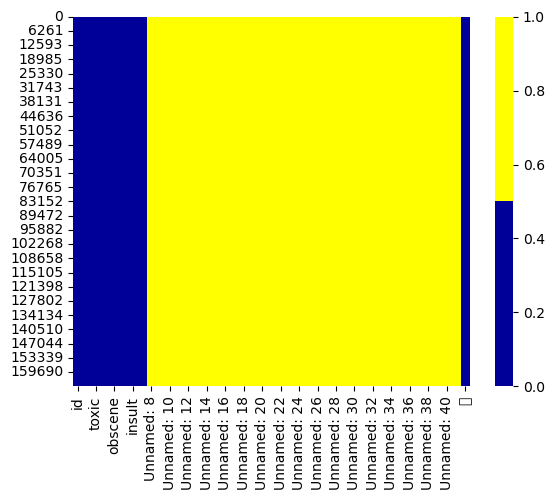

In [15]:
colors= ['#000099', '#ffff00']
pal=sns.color_palette(colors)
sns.heatmap(df_filtered.isnull(),cmap=pal)
plt.show()

In [16]:
df1=df_filtered.iloc[:,2:8]
df1

toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
165999      0             0        0       0       0              0
166000      0             0        0       0       0              0
166001      0             0        0       0       0              0
166002      0             0        0       0       0              0
166003      0             0        0       0       0              0

[160794 rows x 6 columns]

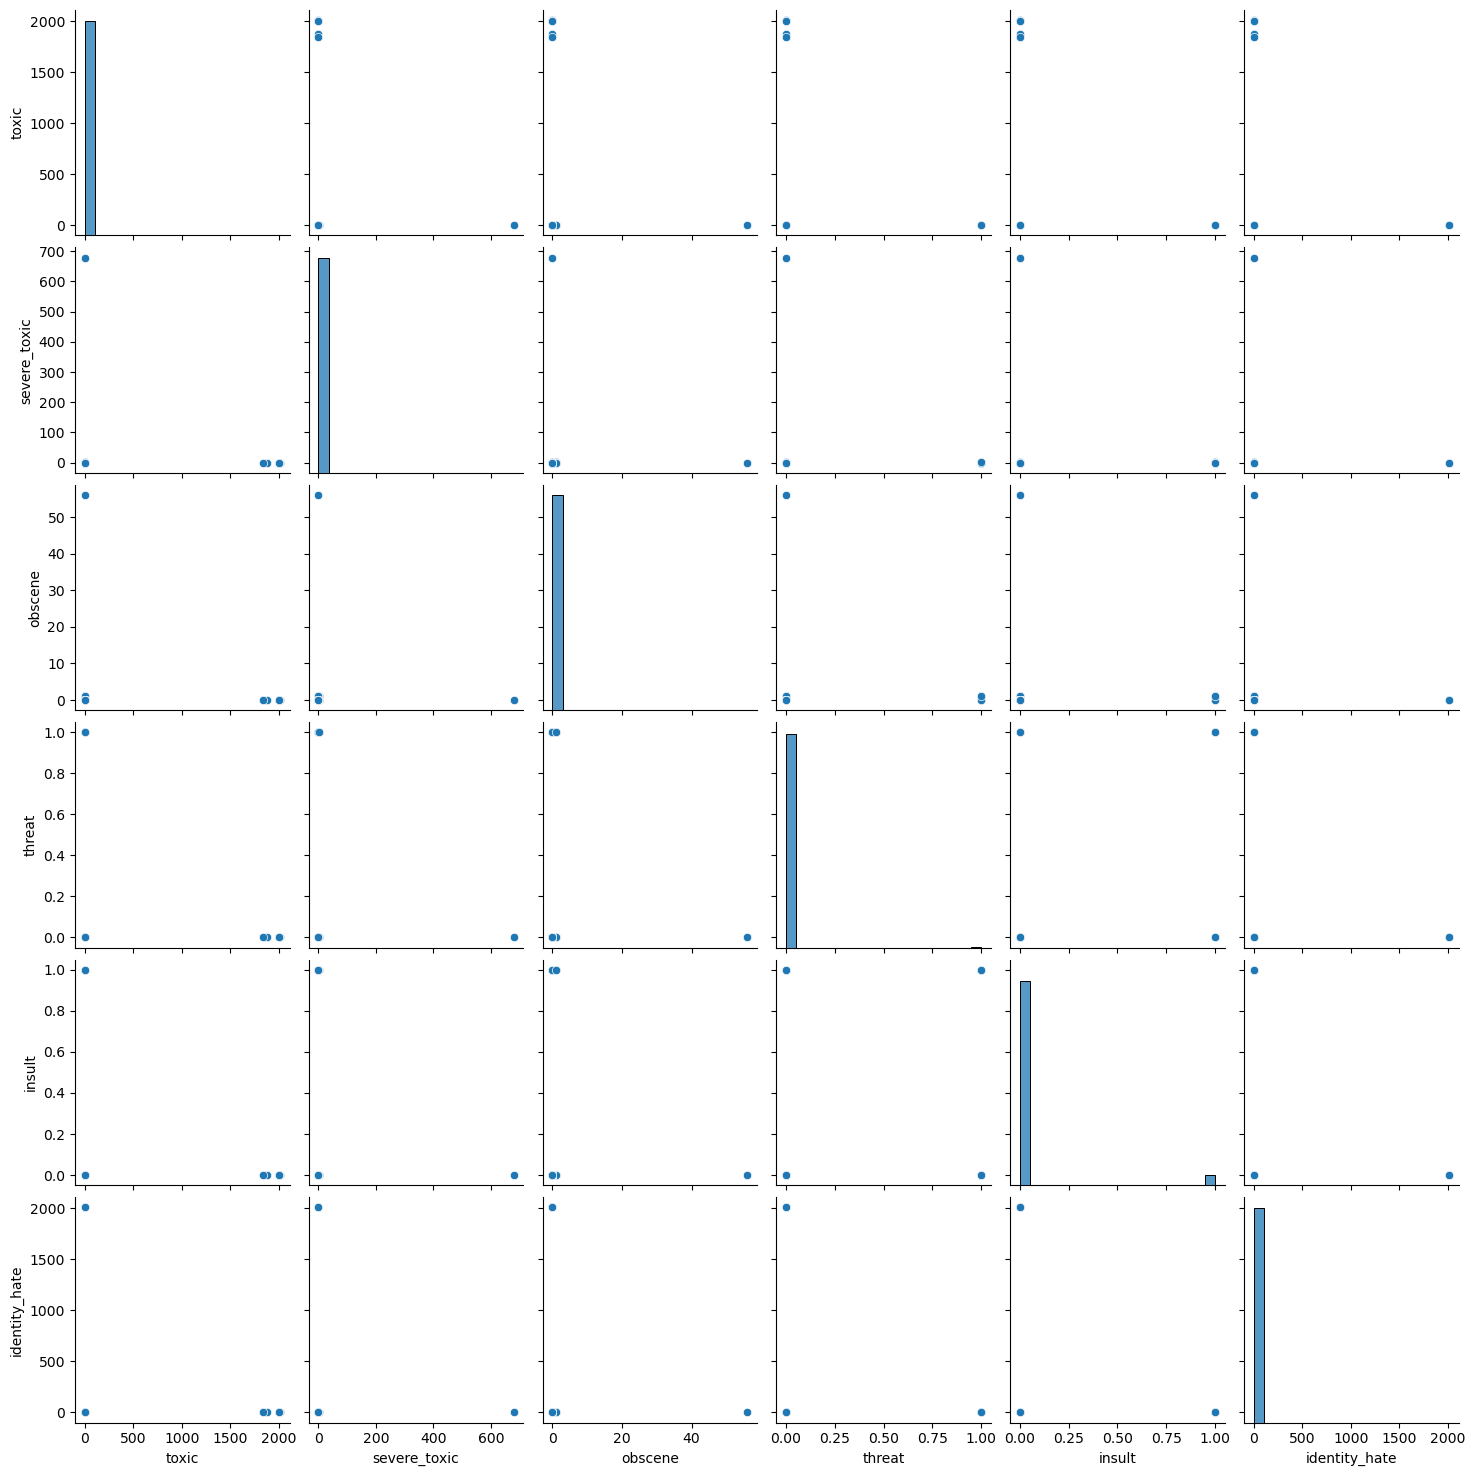

In [17]:
sns.pairplot(df1,palette='mako')
plt.show()

In [18]:
df1.corr()

toxic  severe_toxic   obscene    threat    insult  \
toxic          1.000000      0.000372  0.012839  0.003500  0.014502   
severe_toxic   0.000372      1.000000  0.019463  0.007255  0.021397   
obscene        0.012839      0.019463  1.000000  0.119142  0.628206   
threat         0.003500      0.007255  0.119142  1.000000  0.149392   
insult         0.014502      0.021397  0.628206  0.149392  1.000000   
identity_hate  0.000029      0.000123  0.002485  0.001345  0.003640   

               identity_hate  
toxic               0.000029  
severe_toxic        0.000123  
obscene             0.002485  
threat              0.001345  
insult              0.003640  
identity_hate       1.000000

[]

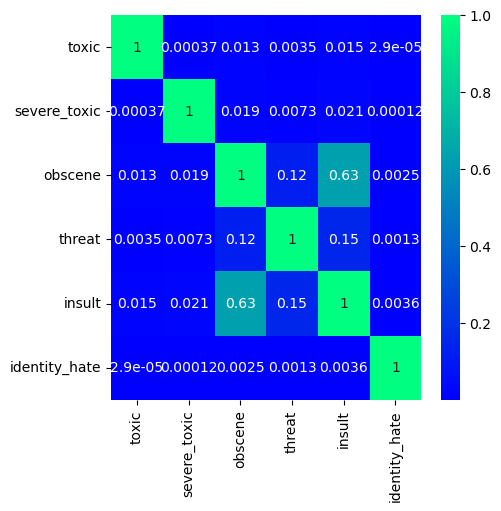

In [19]:
plt.figure(figsize=(5,5))
sns.heatmap(df1.corr(), cmap='winter', annot=True)
plt.plot()

In [20]:
df_filtered.describe()

toxic   severe_toxic        obscene         threat  \
count  160794.000000  160794.000000  160794.000000  160794.000000   
mean        0.168022       0.014180       0.052850       0.002998   
std        11.960749       1.696187       0.263083       0.054669   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2010.000000     679.000000      56.000000       1.000000   

              insult  identity_hate  Unnamed: 37  Unnamed: 38  Unnamed: 39  \
count  160794.000000  160794.000000          1.0          1.0          1.0   
mean        0.048969       0.033726          0.0          0.0          0.0   
std         0.215805       7.082362          NaN          NaN          NaN   
min         0.000000       0.000000          0.0          0.0          0.0   
25%         0.000000       0.000000          0.0          0.0          0.0   
50%         0.000000       0.000000          0.0          0.0          0.0   
75%         0.000000       0.000000          0.0          0.0          0.0   
max         1.000000    2008.000000          0.0          0.0          0.0   

       Unnamed: 40  Unnamed: 41  
count          1.0          1.0  
mean           0.0          0.0  
std            NaN          NaN  
min            0.0          0.0  
25%            0.0          0.0  
50%            0.0          0.0  
75%            0.0          0.0  
max            0.0          0.0

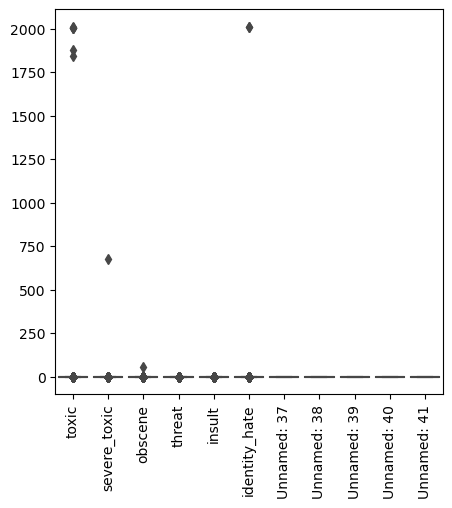

In [21]:
plt.figure(figsize=(5,5))
box = sns.boxplot(data = df_filtered)
plt.xticks(rotation=90)
plt.show()

In [22]:
for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    unique_values = df_filtered[col].unique()
    print(f"Unique values in {col}: {unique_values}")


Unique values in toxic: [   0    1 2010 2003 1877 1842 2001 2005]
Unique values in severe_toxic: [  0   1 679]
Unique values in obscene: [ 0  1 56]
Unique values in threat: [0 1]
Unique values in insult: [0 1]
Unique values in identity_hate: [   0    1 2008]


In [23]:
# List of binary columns
binary_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Fill non-binary values with the mode of each column
for col in binary_columns:
    mode_value = df_filtered[col].mode().iloc[0]  # Get the mode value
    df_filtered[col] = df_filtered[col].apply(lambda x: mode_value if x not in [0, 1] else x)

In [24]:
for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    unique_values = df_filtered[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in toxic: [0 1]
Unique values in severe_toxic: [0 1]
Unique values in obscene: [0 1]
Unique values in threat: [0 1]
Unique values in insult: [0 1]
Unique values in identity_hate: [0 1]


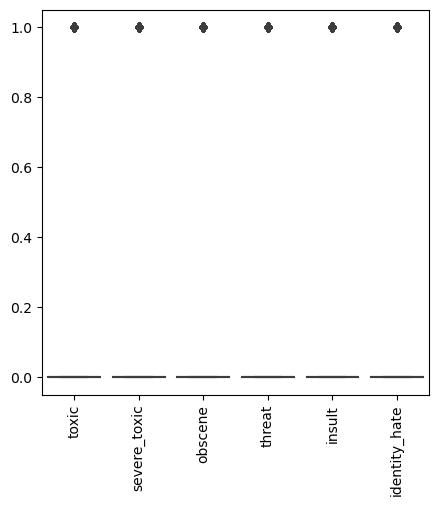

In [25]:
plt.figure(figsize=(5,5))
box = sns.boxplot(data = df_filtered[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']])
plt.xticks(rotation=90)
plt.show()

In [26]:
df_filtered

id                                       comment_text  \
0       0000997932d777bf  ExplanationWhy the edits made under my usernam...   
1       000103f0d9cfb60f  Daww He matches this background colour Im seem...   
2       000113f07ec002fd  Hey man Im really not trying to edit war Its j...   
3       0001b41b1c6bb37e  MoreI cant make any real suggestions on improv...   
4       0001d958c54c6e35  You sir are my hero Any chance you remember wh...   
...                  ...                                                ...   
165999  ffe987279560d7ff  And for the second time of asking when your vi...   
166000  ffea4adeee384e90  You should be ashamed of yourself That is a ho...   
166001  ffee36eab5c267c9  Spitzer Umm theres no actual article for prost...   
166002  fff125370e4aaaf3  And it looks like it was actually you who put ...   
166003  fff46fc426af1f9a  And  I really dont think you understand  I cam...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  \
0           0             0        0       0       0              0   
1           0             0        0       0       0              0   
2           0             0        0       0       0              0   
3           0             0        0       0       0              0   
4           0             0        0       0       0              0   
...       ...           ...      ...     ...     ...            ...   
165999      0             0        0       0       0              0   
166000      0             0        0       0       0              0   
166001      0             0        0       0       0              0   
166002      0             0        0       0       0              0   
166003      0             0        0       0       0              0   

       Unnamed: 8 Unnamed: 9  ... Unnamed: 33 Unnamed: 34 Unnamed: 35  \
0             NaN        NaN  ...         NaN         NaN         NaN   
1             NaN        NaN  ...         NaN         NaN         NaN   
2             NaN        NaN  ...         NaN         NaN         NaN   
3             NaN        NaN  ...         NaN         NaN         NaN   
4             NaN        NaN  ...         NaN         NaN         NaN   
...           ...        ...  ...         ...         ...         ...   
165999        NaN        NaN  ...         NaN         NaN         NaN   
166000        NaN        NaN  ...         NaN         NaN         NaN   
166001        NaN        NaN  ...         NaN         NaN         NaN   
166002        NaN        NaN  ...         NaN         NaN         NaN   
166003        NaN        NaN  ...         NaN         NaN         NaN   

       Unnamed: 36 Unnamed: 37 Unnamed: 38 Unnamed: 39 Unnamed: 40  \
0              NaN         NaN         NaN         NaN         NaN   
1              NaN         NaN         NaN         NaN         NaN   
2              NaN         NaN         NaN         NaN         NaN   
3              NaN         NaN         NaN         NaN         NaN   
4              NaN         NaN         NaN         NaN         NaN   
...            ...         ...         ...         ...         ...   
165999         NaN         NaN         NaN         NaN         NaN   
166000         NaN         NaN         NaN         NaN         NaN   
166001         NaN         NaN         NaN         NaN         NaN   
166002         NaN         NaN         NaN         NaN         NaN   
166003         NaN         NaN         NaN         NaN         NaN   

       Unnamed: 41  \r  
0              NaN  \r  
1              NaN  \r  
2              NaN  \r  
3              NaN  \r  
4              NaN  \r  
...            ...  ..  
165999         NaN  \r  
166000         NaN  \r  
166001         NaN  \r  
166002         NaN  \r  
166003         NaN  \r  

[160794 rows x 43 columns]

In [27]:
# Seting the style for seaborn
sns.set(style="whitegrid")

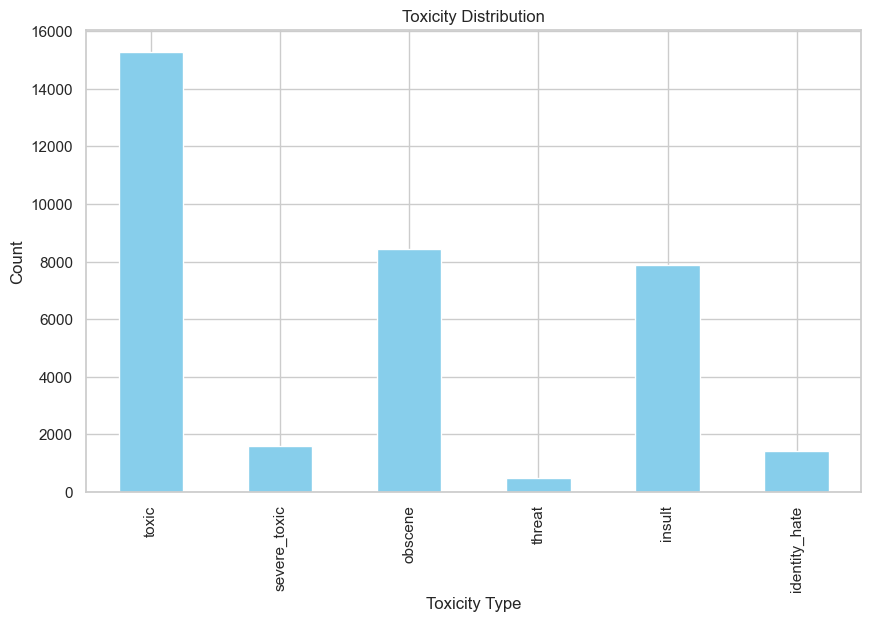

In [28]:
toxicity_counts = df_filtered[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
plt.figure(figsize=(10, 6))
toxicity_counts.plot(kind='bar', color='skyblue')
plt.title('Toxicity Distribution')
plt.xlabel('Toxicity Type')
plt.ylabel('Count')
plt.show()

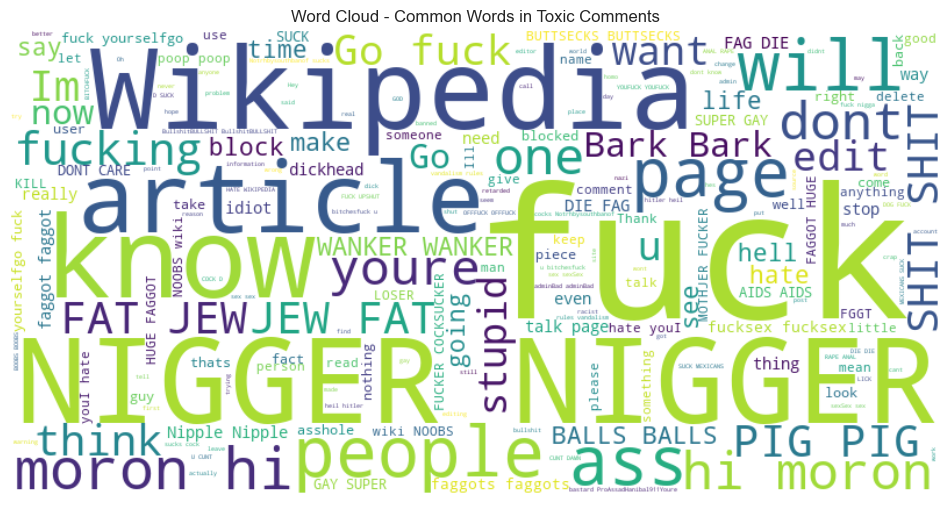

In [29]:
from wordcloud import WordCloud
toxic_comments = df_filtered[df_filtered['toxic'] == 1]['comment_text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(toxic_comments)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Common Words in Toxic Comments')
plt.show()

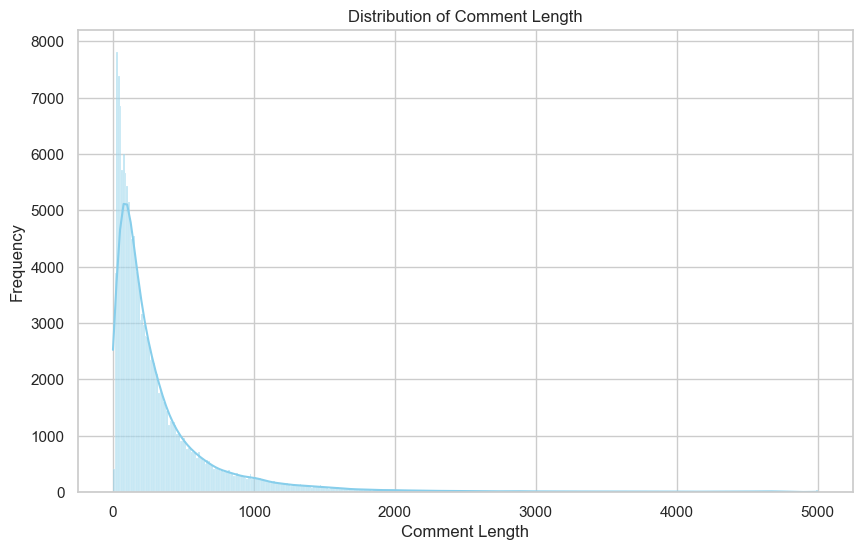

In [30]:
df_filtered['comment_length'] = df_filtered['comment_text'].apply(len)  # assuming 'comment_text' is the text column
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['comment_length'], kde=True, color='skyblue')
plt.title('Distribution of Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

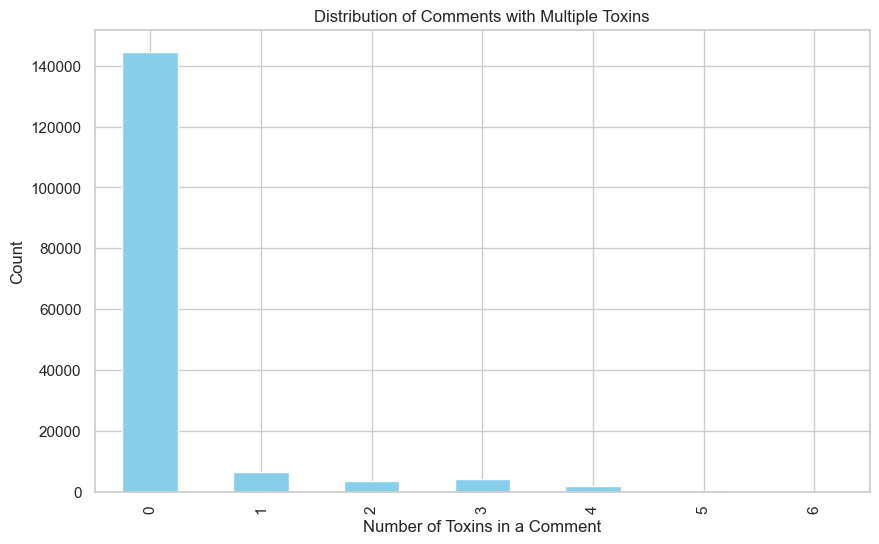

In [31]:
multi_toxicity_counts = df_filtered[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1).value_counts()
plt.figure(figsize=(10, 6))
multi_toxicity_counts.sort_index().plot(kind='bar', stacked=True, color='skyblue')
plt.title('Distribution of Comments with Multiple Toxins')
plt.xlabel('Number of Toxins in a Comment')
plt.ylabel('Count')
plt.show()

In [32]:
# Summing up toxicity columns to create a 'Toxicity Level' column
df_filtered['Toxicity Level'] = df_filtered[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)
# Mapping values to 'Non-Toxic', 'Toxic', 'Severely Toxic' using if conditions
def map_toxicity_level(x):
    if x == 0:
        return 'Non-Toxic'
    elif x == 1:
        return 'Toxic'
    else:
        return 'Severely Toxic'
df_filtered['Classification'] = df_filtered['Toxicity Level'].apply(map_toxicity_level)
# Drop the intermediate 'Toxicity Level' column
df_filtered.drop(columns=['Toxicity Level'], inplace=True)

In [33]:
df_filtered['Classification'].value_counts()

Non-Toxic         144580
Severely Toxic      9863
Toxic               6351
Name: Classification, dtype: int64

In [34]:
data=df_filtered[['comment_text','Classification']]
data

comment_text Classification
0       ExplanationWhy the edits made under my usernam...      Non-Toxic
1       Daww He matches this background colour Im seem...      Non-Toxic
2       Hey man Im really not trying to edit war Its j...      Non-Toxic
3       MoreI cant make any real suggestions on improv...      Non-Toxic
4       You sir are my hero Any chance you remember wh...      Non-Toxic
...                                                   ...            ...
165999  And for the second time of asking when your vi...      Non-Toxic
166000  You should be ashamed of yourself That is a ho...      Non-Toxic
166001  Spitzer Umm theres no actual article for prost...      Non-Toxic
166002  And it looks like it was actually you who put ...      Non-Toxic
166003  And  I really dont think you understand  I cam...      Non-Toxic

[160794 rows x 2 columns]

In [35]:
data['Classification'] = data['Classification'].astype('category')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160794 entries, 0 to 166003
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   comment_text    160794 non-null  object  
 1   Classification  160794 non-null  category
dtypes: category(1), object(1)
memory usage: 2.6+ MB


In [37]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.4 MB/s eta 0:00:09
      --------------------------------------- 0.3/12.8 MB 2.1 MB/s eta 0:00:06
     - -------------------------------------- 0.5/12.8 MB 2.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/12.8 MB 2.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/12.8 MB 3.1 MB/s eta 0:00:04
     --- ------------------------------------ 1.0/12.8 MB 3.2 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/12.8 MB 3.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.5/12.8 MB 3.6 MB/s eta 0:00:04
     ----- ---------------------------------- 1.6/12.8 MB 3.5 MB/s eta 0:00:04
     ----- ---------------------------------- 1.9/12.8 MB 3.7 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 3.7 MB/s

### SPACY for Text_PreProcessing

In [38]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Randomly sample a subset of the data (adjust the size as needed)
data = data.sample(n=10000, random_state=42)

# Display the initial classification distribution
print(data['Classification'].value_counts())

# Initialize spaCy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Define a function for text processing
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and token.text.lower() not in STOP_WORDS]
    return ' '.join(tokens)

# Apply text processing to the entire DataFrame
data['comment_text'] = data['comment_text'].apply(preprocess_text)

# Display the updated classification distribution
print(data['Classification'].value_counts())


Non-Toxic         8989
Severely Toxic     617
Toxic              394
Name: Classification, dtype: int64
Non-Toxic         8989
Severely Toxic     617
Toxic              394
Name: Classification, dtype: int64


In [39]:
data

comment_text  Classification
165441  template talkcampaignbox chinese civil war not...       Non-Toxic
137992  congratulationsdear congratulations new family...       Non-Toxic
50569   fuck fuck youre stupid nigger lover fuck dead ...  Severely Toxic
138267  confuse sarah goldberg heaven apparently die t...       Non-Toxic
56268   ve month thank welcome maybe update user page ...       Non-Toxic
...                                                   ...             ...
137655  year old mayor date year old girl see photogra...       Non-Toxic
163078                             delete spoiler warning       Non-Toxic
87752   spell number agree entirely cat dog dandy advi...       Non-Toxic
48255   author guy website creditability website remov...       Non-Toxic
14635   godfreydaniel disagree editor personal level t...       Non-Toxic

[10000 rows x 2 columns]

In [40]:
data['Classification']=pd.Categorical(data['Classification'])
data['Classification']=data['Classification'].cat.codes

In [41]:
data

comment_text  Classification
165441  template talkcampaignbox chinese civil war not...               0
137992  congratulationsdear congratulations new family...               0
50569   fuck fuck youre stupid nigger lover fuck dead ...               1
138267  confuse sarah goldberg heaven apparently die t...               0
56268   ve month thank welcome maybe update user page ...               0
...                                                   ...             ...
137655  year old mayor date year old girl see photogra...               0
163078                             delete spoiler warning               0
87752   spell number agree entirely cat dog dandy advi...               0
48255   author guy website creditability website remov...               0
14635   godfreydaniel disagree editor personal level t...               0

[10000 rows x 2 columns]

### Tf_IDF Vectorizer

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus = data['comment_text']
tfidf = vectorizer.fit_transform(corpus)
pd.DataFrame(tfidf.toarray())
print(tfidf)

  (0, 34043)	0.24014025387884946
  (0, 35337)	0.22615608489762667
  (0, 6675)	0.23439685420392511
  (0, 25726)	0.259367632759154
  (0, 31455)	0.2680346234353588
  (0, 22259)	0.130919503436236
  (0, 30216)	0.2820763319515054
  (0, 21201)	0.22615608489762667
  (0, 33852)	0.2371851766138362
  (0, 5493)	0.30312481999496504
  (0, 5314)	0.34176114767511606
  (0, 30242)	0.4704016711432508
  (0, 30701)	0.25111081865690316
  (1, 5079)	0.12924641008567045
  (1, 11397)	0.09941841278757856
  (1, 5952)	0.0839922485445287
  (1, 10296)	0.2053229517868572
  (1, 18087)	0.13503384906720176
  (1, 12594)	0.07425543544617721
  (1, 35741)	0.19657558095224165
  (1, 9273)	0.14069400938471066
  (1, 25128)	0.14550803494120257
  (1, 29379)	0.19657558095224165
  (1, 12069)	0.15915386850849778
  (1, 29988)	0.2053229517868572
  :	:
  (9998, 12594)	0.05946622165621847
  (9998, 34043)	0.3357652107878216
  (9998, 22259)	0.045763063415517176
  (9999, 30826)	0.3022024834075114
  (9999, 3088)	0.3022024834075114
  (9999, 

In [43]:
import numpy as np

# Transform the text data using TF-IDF vectorization
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get feature names and IDF values
feature_names = vectorizer.get_feature_names_out()
idf_values = vectorizer.idf_

# Create a dictionary with feature names as keys and IDF values as values
dictionary = dict(zip(feature_names, np.log(idf_values)))

# Calculate TF-IDF values for each word in each sentence
for sent in corpus:
    for word in sent.split():
        tf_idf = dictionary.get(word.lower(), 0) * (sent.count(word) / len(sent.split()))
        print(word + " ----> " + str(tf_idf))


template ----> 0.10836119202175867
talkcampaignbox ----> 0.1502073652810768
chinese ----> 0.12890904163303404
civil ----> 0.12091121319320836
war ----> 0.10455764680080536
notice ----> 0.10138326213779891
talk ----> 0.2097108128934914
page ----> 0.0649404124522692
today ----> 0.11270931294179178
reply ----> 0.11051800111993564
correct ----> 0.10376927780124523
m ----> 0.0
wrong ----> 0.10138326213779891
talk ----> 0.2097108128934914
website ----> 0.10538311159009618
congratulationsdear ----> 0.059292381032003995
congratulations ----> 0.1132567768920014
new ----> 0.0364671784815474
family ----> 0.046560031744211645
di ----> 0.054765582957294924
idea ----> 0.04119969726416014
cat ----> 0.050885148013039755
person ----> 0.038985402501668584
hope ----> 0.039333435890868094
mother ----> 0.05035404822881364
kitty ----> 0.11858476206400799
bring ----> 0.044370419489292046
lot ----> 0.04044250877667455
joy ----> 0.0566283884460007
grow ----> 0.09560271852471418
kitty ----> 0.11858476206400799


basic ----> 0.03095203022912802
structure ----> 0.033432393867238036
provide ----> 0.026179604887082562
balance ----> 0.03299058332232618
ahead ----> 0.03146638491136133
request ----> 0.025907111589699043
mediation ----> 0.03384177860610664
like ----> 0.0191412959515049
hear ----> 0.028818800919799374
editor ----> 0.07233762887844555
especially ----> 0.028628456171880444
fire ----> 0.03220007348947384
star ----> 0.031621583550854954
olaf ----> 0.03809609238540815
covenant ----> 0.038846732400278486
issue ----> 0.025114606214651277
mineralalthough ----> 0.11858476206400799
mineral ----> 0.6977600079011598
water ----> 0.3021242893728818
contain ----> 0.09180442841064301
disolve ----> 0.11858476206400799
mineral ----> 0.6977600079011598
call ----> 0.1602436174983469
mineral ----> 0.6977600079011598
water ----> 0.3021242893728818
call ----> 0.1602436174983469
mineral ----> 0.6977600079011598
water ----> 0.3021242893728818
come ----> 0.07280293547435308
underground ----> 0.11029914593439509

upload ----> 0.08150301316572924
content ----> 0.07003581189289824
ifd ----> 0.21458195040153827
ill ----> 0.07012989967699729
kindly ----> 0.09260496937938274
ask ----> 0.06684664542624841
step ----> 0.08649769771283664
involve ----> 0.07913344011847141
abu ----> 0.09846936209165351
badali ----> 0.1052177789692225
censure ----> 0.10247041718800128
behavior ----> 0.08524986205454832
wikiproject ----> 0.06446138148877673
red ----> 0.11243006849981224
hot ----> 0.10437926972629226
chili ----> 0.09882063505334
peppers ----> 0.09691111220849441
january ----> 0.047584676408941894
newsletter ----> 0.12622908341846184
red ----> 0.11243006849981224
hot ----> 0.10437926972629226
chili ----> 0.09882063505334
peppers ----> 0.09691111220849441
wikiproject ----> 0.06446138148877673
newsletter ----> 0.12622908341846184
volume ----> 0.01767738296978089
january ----> 0.047584676408941894
remember ----> 0.014998964977640515
take ----> 0.012918665729973184
piss ----> 0.049551267591743435
party ----> 0.0

think ----> 0.06057616440046417
not ----> 0.2877032550496828
wht ----> 0.7510368264053839
article ----> 0.3030839825335117
case ----> 0.03180384120938601
reasonable ----> 0.039081529078260714
assume ----> 0.03633674898583399
use ----> 0.028244463205258318
phrase ----> 0.07909893859855273
origin ----> 0.11941330256812356
life ----> 0.06894219705706309
describe ----> 0.035463298147132616
creationist ----> 0.09182490824872167
perspective ----> 0.04093365583665762
fact ----> 0.030201745898938367
creationist ----> 0.09182490824872167
usage ----> 0.040443288662174955
phrase ----> 0.07909893859855273
discuss ----> 0.06748378717560033
scientific ----> 0.03980443418937452
term ----> 0.033974807894818854
gain ----> 0.04060009266064093
vogue ----> 0.047336778875266314
scientist ----> 0.04139532370417152
provide ----> 0.033009067031538886
account ----> 0.0341763580176556
origin ----> 0.11941330256812356
find ----> 0.027901934361156226
relatively ----> 0.044008168490115344
unlikely ----> 0.04281165

need ----> 0.06617312465431524
spell ----> 0.050110128694523415
error ----> 0.045749296744444695
wikistalke ----> 0.055149572967197545
permit ----> 0.052003203503033654
talk ----> 0.08278058403690448
page ----> 0.051268746672844104
bold ----> 0.050110128694523415
details ----> 0.059292381032003995
preparation ----> 0.05730241653321712
explosive ----> 0.05730241653321712
remove ----> 0.034623499175540834
btw ----> 0.04877500073437842
add ----> 0.06477519353094104
history ----> 0.038985402501668584
historic ----> 0.05165324103037329
book ----> 0.041547448971583134
feel ----> 0.03805737177132742
free ----> 0.040040277703977264
probably ----> 0.08159907310770032
change ----> 0.035757567297251144
regard ----> 0.04879724753957371
edit ----> 0.06411422450593894
casual ----> 0.06211684969766466
user ----> 0.040046378430025946
automatically ----> 0.050910695750160315
vandalism ----> 0.0903038799360786
unpleasant ----> 0.06329055179258902
edit ----> 0.06411422450593894
comment ----> 0.0799559341

bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ----> 2.2095733583536727
bark ---->

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker ----> 1.0887459141311253
nigger ----> 1.0170580317734303
licker -

leader ----> 0.01636835149334003
like ----> 0.006362149943766671
philip ----> 0.005828412789532552
alexander ----> 0.02370036222263294
great ----> 0.008792807871772442
slav ----> 0.019367711855726236
people ----> 0.007125794263994406
language ----> 0.0046540285580490715
closely ----> 0.00570378137752
relate ----> 0.009523222019987964
bulgarian ----> 0.005963014763258473
confusion ----> 0.00544334829787417
identity ----> 0.005430894905004638
people ----> 0.007125794263994406
country ----> 0.009500114709450055
gyordan ----> 0.006455903951908745
veselinov ----> 0.006455903951908745
canadian ----> 0.005510737402928974
ambassador ----> 0.005925090555658235
canada ----> 0.005430894905004638
interview ----> 0.005456117164446676
ottawa ----> 0.00633115575459505
citizen ----> 0.011212377262698874
quote ----> 0.009308057116098143
appear ----> 0.004427550020949514
extremely ----> 0.005361949171462968
relevant ----> 0.009469907692566082
article ----> 0.01823714508081303
try ----> 0.019407525795779

suggestion ----> 0.06236632201055466
byte ----> 0.2215560647062204
adjustment ----> 0.15085520640861416
byte ----> 0.2215560647062204
old ----> 0.05699323652894798
signature ----> 0.20553010197505986
byte ----> 0.2215560647062204
good ----> 0.04414419088479661
think ----> 0.04110525441460069
want ----> 0.04553309132537754
use ----> 0.04640161812292438
assassin ----> 0.07891333422691688
default ----> 0.07301896107146157
font ----> 0.07608761260735955
style ----> 0.06467585544835967
signature ----> 0.20553010197505986
t ----> 0.0
f ----> 0.0
c ----> 0.0
f ----> 0.0
snaps ----> 0.08665809535446739
finger ----> 0.07953294630479708
damn ----> 0.07323788039968808
use ----> 0.149912920089448
easy ----> 0.06596018527984221
updating ----> 0.08665809535446739
everincrease ----> 0.08665809535446739
number ----> 0.06025040980797139
place ----> 0.054363560362451574
use ----> 0.149912920089448
vandalism ----> 0.059044844573589855
count ----> 0.06830893547727435
userbox ----> 0.07906656873464094
bewa

welcome ----> 0.07267937335312939
juicetalk ----> 0.07152731680051276
think ----> 0.04426719706187767
table ----> 0.03428874539345228
conjugation ----> 0.043329047677233695
good ----> 0.047539897875934815
idea ----> 0.03010747107765549
happy ----> 0.03193173957632819
makeset ----> 0.043329047677233695
give ----> 0.027964459112201294
information ----> 0.02632937667931508
absoutely ----> 0.043329047677233695
think ----> 0.04426719706187767
relevant ----> 0.031778824852938106
langague ----> 0.08665809535446739
article ----> 0.08742807188466685
include ----> 0.05423830672656906
lead ----> 0.06331040902503639
qds ----> 0.043329047677233695
root ----> 0.03728997777499628
hebrew ----> 0.15906589260959417
article ----> 0.08742807188466685
write ----> 0.05275083857774597
s ----> 0.0
point ----> 0.026211154418586687
m ----> 0.0
try ----> 0.026050871164335073
article ----> 0.08742807188466685
series ----> 0.033252434193527816
article ----> 0.08742807188466685
article ----> 0.08742807188466685
sha

mention ----> 0.023113048603597645
lady ----> 0.015653246677691045
refer ----> 0.02077945471716931
specific ----> 0.008550140467647419
lady ----> 0.015653246677691045
lowercase ----> 0.022473929618256155
lady ----> 0.015653246677691045
change ----> 0.03547748191372176
mention ----> 0.023113048603597645
garret ----> 0.011765589969797138
fitzgerald ----> 0.022473929618256155
garrett ----> 0.005882794984898569
fitzgerald ----> 0.022473929618256155
remove ----> 0.0034352296832129287
word ----> 0.011546102724137447
g ----> 0.0
gearid ----> 0.011765589969797138
og ----> 0.06922945248105501
fitzgerald ----> 0.022473929618256155
mr ----> 0.014081595333681404
gearid ----> 0.011765589969797138
mr ----> 0.014081595333681404
fitzgerald ----> 0.022473929618256155
grasp ----> 0.005261675348707628
actually ----> 0.007768330158423901
different ----> 0.008091458240876174
people ----> 0.029219477523768182
mr ----> 0.014081595333681404
big ----> 0.004281490499097914
gaelic ----> 0.011236964809128077
indi

longplanned ----> 0.010288175704183342
offensive ----> 0.008417812058376566
invasion ----> 0.028007272739738683
oppose ----> 0.008039320681635766
un ----> 0.12395937817441682
un ----> 0.12395937817441682
security ----> 0.017984805169129453
council ----> 0.01817917534935598
resolution ----> 0.017563902772805586
june ----> 0.016835624116753132
president ----> 0.008432688519945273
reagan ----> 0.009728096589068801
france ----> 0.00908958767467799
meet ----> 0.007504781173693534
heads ----> 0.010288175704183342
government ----> 0.00798286981310062
versailles ----> 0.010288175704183342
economic ----> 0.00885424129817263
summit ----> 0.010089376065541883
dispatch ----> 0.009825930415287792
habib ----> 0.010288175704183342
israel ----> 0.08694908175305432
try ----> 0.012371189959318938
restore ----> 0.008058907458971325
ceasefire ----> 0.020576351408366684
day ----> 0.020445780885035795
united ----> 0.007938234138305472
states ----> 0.008197341339221119
join ----> 0.008120243045215667
unanimo

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Split the data into train & test sets:

In [44]:
from sklearn.model_selection import train_test_split

X = data['comment_text']
y = data['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6700,), (3300,), (6700,), (3300,))

#### Use TF-IDF to convert test to numeric

In [46]:
X=data['comment_text']
y=data['Classification']

In [47]:
# Vectors created with TF-IDF
X_tfidf = vectorizer.fit_transform(X)

X_tfidf.shape

(10000, 35882)

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote=SMOTE(sampling_strategy='auto')

In [50]:
X1,y1=smote.fit_resample(X_tfidf,y)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# You can print the shapes of the resulting sets if needed
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (21573, 35882)
y_train shape: (21573,)
X_test shape: (5394, 35882)
y_test shape: (5394,)


# build the model logistic classification

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
clf=LogisticRegression()

In [54]:
# trian the model

In [55]:
clf.fit(X_train,y_train)

LogisticRegression()

In [56]:
# make prediction for training data

In [57]:
train_pred=clf.predict(X_train)
train_pred

array([0, 0, 0, ..., 0, 1, 2], dtype=int8)

In [58]:
test_pred=clf.predict(X_test)
test_pred

array([0, 2, 2, ..., 1, 1, 2], dtype=int8)

In [59]:
# get training metrics

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

In [61]:
cm=confusion_matrix(y_train,train_pred)
cm

array([[7109,   10,   73],
       [   7, 7176,   10],
       [   0,    8, 7180]], dtype=int64)

<Axes: >

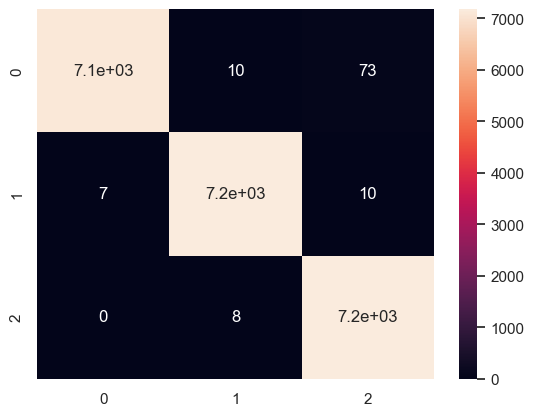

In [62]:
sns.heatmap(cm,annot=True)

In [63]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7192
           1       1.00      1.00      1.00      7193
           2       0.99      1.00      0.99      7188

    accuracy                           0.99     21573
   macro avg       1.00      0.99      0.99     21573
weighted avg       1.00      0.99      0.99     21573



In [64]:
# get testing metrics

In [65]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[1748,    4,   45],
       [   7, 1783,    6],
       [   0,    1, 1800]], dtype=int64)

<Axes: >

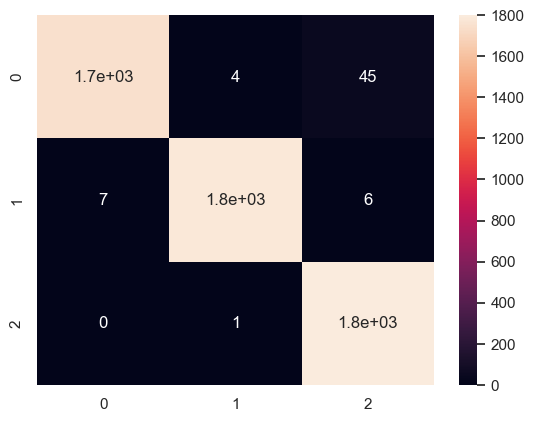

In [66]:
sns.heatmap(cm,annot=True)

In [67]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1797
           1       1.00      0.99      0.99      1796
           2       0.97      1.00      0.99      1801

    accuracy                           0.99      5394
   macro avg       0.99      0.99      0.99      5394
weighted avg       0.99      0.99      0.99      5394



In [68]:
#Classification using  SVM

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
svm_model=SVC(C=0.5,gamma=0.01,kernel='rbf')

In [71]:
svm_model.fit(X_train,y_train)

SVC(C=0.5, gamma=0.01)

In [72]:
train_pred=svm_model.predict(X_train)

In [73]:
cm=confusion_matrix(y_train,train_pred)
cm

array([[7045,    0,  147],
       [2616, 3872,  705],
       [3345,   15, 3828]], dtype=int64)

<Axes: >

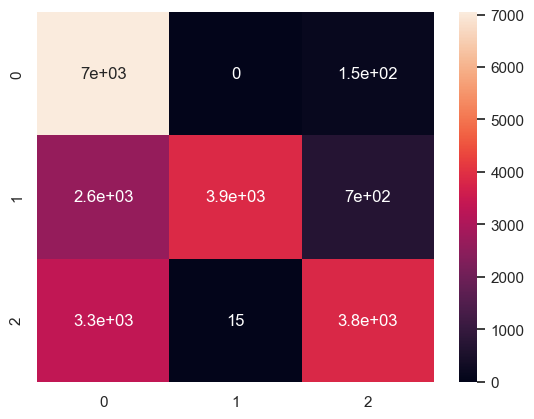

In [74]:
sns.heatmap(cm,annot=True)

In [75]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.54      0.98      0.70      7192
           1       1.00      0.54      0.70      7193
           2       0.82      0.53      0.65      7188

    accuracy                           0.68     21573
   macro avg       0.79      0.68      0.68     21573
weighted avg       0.79      0.68      0.68     21573



In [76]:
#test data

In [77]:
test_pred=svm_model.predict(X_test)

In [78]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[1758,    0,   39],
       [ 662,  973,  161],
       [ 831,    6,  964]], dtype=int64)

<Axes: >

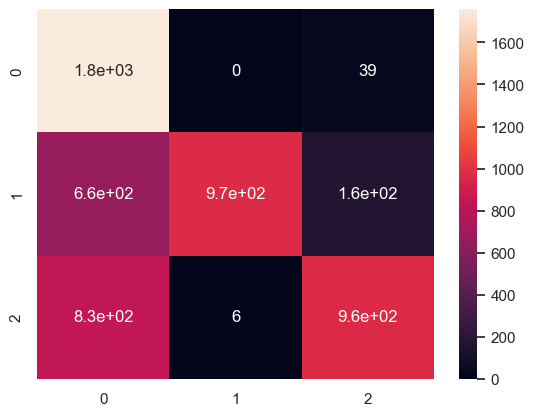

In [79]:
sns.heatmap(cm,annot=True)

In [80]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.54      0.98      0.70      1797
           1       0.99      0.54      0.70      1796
           2       0.83      0.54      0.65      1801

    accuracy                           0.69      5394
   macro avg       0.79      0.69      0.68      5394
weighted avg       0.79      0.69      0.68      5394



# use Grid search to find the rignt hyperparameter values

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
pgrid=[
    {
        'C':[0.4,0.45,0.5,0.55,0.6,0.65],
        'gamma':[0.1,0.01,0.001],
        'kernel': ['rbf', 'linear', 'poly']
    }
]

In [83]:
target=data.copy()
target

comment_text  Classification
165441  template talkcampaignbox chinese civil war not...               0
137992  congratulationsdear congratulations new family...               0
50569   fuck fuck youre stupid nigger lover fuck dead ...               1
138267  confuse sarah goldberg heaven apparently die t...               0
56268   ve month thank welcome maybe update user page ...               0
...                                                   ...             ...
137655  year old mayor date year old girl see photogra...               0
163078                             delete spoiler warning               0
87752   spell number agree entirely cat dog dandy advi...               0
48255   author guy website creditability website remov...               0
14635   godfreydaniel disagree editor personal level t...               0

[10000 rows x 2 columns]

In [84]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Assuming 'data' is your DataFrame and 'target_column' is your target variable
# Replace 'data' and 'target_column' with your actual DataFrame and target variable names

# Separate features and target variable
X = data.drop(columns=['comment_text'])
y = data['Classification']

# Apply necessary data preprocessing steps
# ... (encode categorical columns, scale numerical columns, etc.)

# Define your model and parameter grid for GridSearchCV
svm_classifier = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']  # Include the 'kernel' parameter options
}

# Perform GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X, y)

# Once the grid search is done, you can access the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Fit the final model using the best parameters
final_model = SVC(**best_params)
final_model.fit(X, y)


SVC(C=0.1, gamma=1)

# After using gridsearch C=0.1,gamma=1

In [85]:
svm_model=SVC(C=0.1,gamma=1,kernel='rbf')

In [86]:
svm_model.fit(X_train,y_train)

SVC(C=0.1, gamma=1)

In [87]:
train_pred=svm_model.predict(X_train)

In [88]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,train_pred)
cm

array([[7160,    0,   32],
       [ 456, 6707,   30],
       [ 617,   17, 6554]], dtype=int64)

<Axes: >

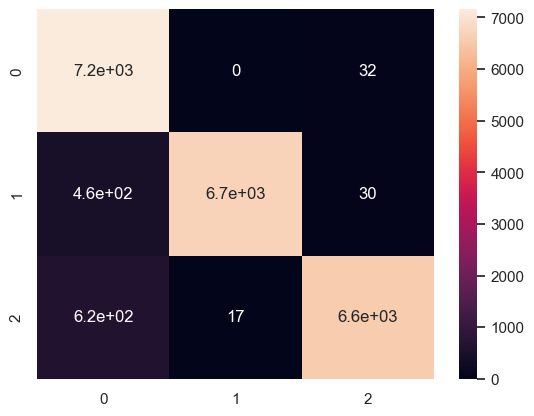

In [89]:
sns.heatmap(cm,annot=True)

In [90]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      7192
           1       1.00      0.93      0.96      7193
           2       0.99      0.91      0.95      7188

    accuracy                           0.95     21573
   macro avg       0.95      0.95      0.95     21573
weighted avg       0.95      0.95      0.95     21573



In [91]:
#test data

In [92]:
test_pred=svm_model.predict(X_test)

In [93]:
cm=confusion_matrix(y_test,test_pred)
cm

array([[1791,    0,    6],
       [ 135, 1653,    8],
       [ 160,    9, 1632]], dtype=int64)

In [94]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1797
           1       0.99      0.92      0.96      1796
           2       0.99      0.91      0.95      1801

    accuracy                           0.94      5394
   macro avg       0.95      0.94      0.94      5394
weighted avg       0.95      0.94      0.94      5394



In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense


data = data


# Preprocessing text data
texts = data['comment_text'].astype(str).values
labels = data['Classification'].astype(int).values

# Tokenizing and padding sequences
max_words = 10000  # Change this to the maximum number of words to tokenize
max_len = 100  # Change this to the maximum length of sequences
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Convert labels to numpy array
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

# LSTM model architecture
embedding_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the LSTM model
batch_size = 100
epochs = 50
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



Epoch 1/50
80/80 [==============================] - 74s 887ms/step - loss: 0.4159 - accuracy: 0.8932 - val_loss: 0.3256 - val_accuracy: 0.9025
Epoch 2/50
80/80 [==============================] - 73s 920ms/step - loss: 0.2316 - accuracy: 0.9208 - val_loss: 0.2217 - val_accuracy: 0.9360
Epoch 3/50
80/80 [==============================] - 71s 882ms/step - loss: 0.0378 - accuracy: 0.9289 - val_loss: 0.2449 - val_accuracy: 0.8970
Epoch 4/50
80/80 [==============================] - 77s 964ms/step - loss: -0.2517 - accuracy: 0.9319 - val_loss: 0.2895 - val_accuracy: 0.9155
Epoch 5/50
80/80 [==============================] - 75s 933ms/step - loss: -0.4141 - accuracy: 0.9326 - val_loss: 0.2332 - val_accuracy: 0.9325
Epoch 6/50
80/80 [==============================] - 76s 956ms/step - loss: -0.8941 - accuracy: 0.9395 - val_loss: 0.4745 - val_accuracy: 0.9250
Epoch 7/50
80/80 [==============================] - 78s 982ms/step - loss: -1.4606 - accuracy: 0.9388 - val_loss: 0.4862 - val_accuracy: 0.

In [96]:
#!pip install tensorflow


In [97]:
#!pip install --upgrade tensorflow


In [98]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Function to create the LSTM model
def create_lstm_model(embedding_dim=128, lstm_out=196, max_words=10000, max_len=100):
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=max_len))
    model.add(SpatialDropout1D(0.4))
    model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

best_accuracy = 0.0
best_params = {}

# Define hyperparameters to tune
embedding_dims = [64, 128]
lstm_outs = [128, 196]

for embedding_dim in embedding_dims:
    for lstm_out in lstm_outs:
        model = create_lstm_model(embedding_dim=embedding_dim, lstm_out=lstm_out)
        model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=0)
        y_pred_probs = model.predict(X_test)
        y_pred = (y_pred_probs > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'embedding_dim': embedding_dim, 'lstm_out': lstm_out}

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)





63/63 [==============================] - 6s 85ms/step
Best Accuracy: 0.9245
Best Parameters: {'embedding_dim': 128, 'lstm_out': 196}


In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

# Load your dataset (replace 'your_data.csv' with your actual file name)
data = data


# Preprocessing text data
texts = data['comment_text'].astype(str).values
labels = data['Classification'].astype(int).values

# Tokenizing and padding sequences
max_words = 10000  # Change this to the maximum number of words to tokenize
max_len = 100  # Change this to the maximum length of sequences
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Convert labels to numpy array
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

# LSTM model architecture
embedding_dim = 64
lstm_out = 128

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the LSTM model
batch_size = 100
epochs = 50
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
80/80 [==============================] - 42s 497ms/step - loss: 0.4372 - accuracy: 0.8953 - val_loss: 0.3606 - val_accuracy: 0.9000
Epoch 2/50
80/80 [==============================] - 42s 532ms/step - loss: 0.2905 - accuracy: 0.9159 - val_loss: 0.2507 - val_accuracy: 0.9300
Epoch 3/50
80/80 [==============================] - 39s 490ms/step - loss: 0.1265 - accuracy: 0.9276 - val_loss: 0.2370 - val_accuracy: 0.9070
Epoch 4/50
80/80 [==============================] - 37s 460ms/step - loss: -0.0145 - accuracy: 0.9320 - val_loss: 0.2107 - val_accuracy: 0.9425
Epoch 5/50
80/80 [==============================] - 37s 461ms/step - loss: -0.2484 - accuracy: 0.9335 - val_loss: 0.4664 - val_accuracy: 0.9205
Epoch 6/50
80/80 [==============================] - 38s 478ms/step - loss: -0.6408 - accuracy: 0.9391 - val_loss: 0.5755 - val_accuracy: 0.8960
Epoch 7/50
80/80 [==============================] - 39s 482ms/step - loss: -0.9709 - accuracy: 0.9390 - val_loss: 0.6242 - val_accuracy: 0.

# Model classification using XGBOOST

In [100]:
!pip install xgboost

In [101]:
import xgboost as xgb

In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
smote=SMOTE(sampling_strategy='auto')

In [104]:
# Assuming y_train has more samples than X_train
y_train = y_train[:X_train.shape[0]]
y_test = y_test[:X_test.shape[0]]

In [105]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)


In [106]:
param_grid3 = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 0.9]
}
clf=xgb.XGBClassifier()
grid_search3 = GridSearchCV(estimator=clf, param_grid=param_grid3,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [107]:
grid_search3.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 6, 10], 'n_estimators': [10, 50, 100],
                         'subsample': [0.5, 0.7, 0.9]},
             scoring='accuracy')

In [108]:
grid_search3.best_params_

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.7}

In [109]:
grid_search3.best_score_

0.9255345372063049

In [110]:
best_model1 = grid_search3.best_estimator_

In [111]:
train_pred_xgb=best_model1.predict(X_train_resampled)

In [112]:
confusion_matrix(y_train_resampled,train_pred_xgb)

array([[7079,   65,   45],
       [  16, 7152,   21],
       [  11,   33, 7145]], dtype=int64)

In [113]:
print(classification_report(y_train_resampled,train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7189
           1       0.99      0.99      0.99      7189
           2       0.99      0.99      0.99      7189

    accuracy                           0.99     21567
   macro avg       0.99      0.99      0.99     21567
weighted avg       0.99      0.99      0.99     21567



In [114]:
test_pred_xgb=best_model1.predict(X_test_resampled)

In [115]:
confusion_matrix(y_test_resampled,test_pred_xgb)

array([[1586,  139,   75],
       [1094,  532,  174],
       [1319,  341,  140]], dtype=int64)

In [116]:
print(classification_report(y_test_resampled,test_pred_xgb))

              precision    recall  f1-score   support

           0       0.40      0.88      0.55      1800
           1       0.53      0.30      0.38      1800
           2       0.36      0.08      0.13      1800

    accuracy                           0.42      5400
   macro avg       0.43      0.42      0.35      5400
weighted avg       0.43      0.42      0.35      5400



In [117]:
! pip install flask

In [118]:
#import pickle

In [119]:
#filename="savedmodel.h5"


In [120]:
#pickle.dump(model,open(filename,'wb'))

In [121]:
#load_model=pickle.load(open(filename,'rb'))

In [122]:
#from tensorflow.keras.models import load_model, save_model

# Train your Keras model (example)
# model.fit(X_train, y_train, ...)

# Save the model
#model.save('savedmodel.h5')


In [123]:
data


comment_text  Classification
165441  template talkcampaignbox chinese civil war not...               0
137992  congratulationsdear congratulations new family...               0
50569   fuck fuck youre stupid nigger lover fuck dead ...               1
138267  confuse sarah goldberg heaven apparently die t...               0
56268   ve month thank welcome maybe update user page ...               0
...                                                   ...             ...
137655  year old mayor date year old girl see photogra...               0
163078                             delete spoiler warning               0
87752   spell number agree entirely cat dog dandy advi...               0
48255   author guy website creditability website remov...               0
14635   godfreydaniel disagree editor personal level t...               0

[10000 rows x 2 columns]

In [124]:
new_data = "thank mabuhay loretta"


In [127]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from joblib import dump
import pandas as pd



In [126]:
# Assuming you have already imported necessary libraries and have your data loaded

# Modify X_train to handle arrays of boolean values
X_train = [str(text) if pd.notna(text).any() else "" for text in X_train]

# Create and train your model
text_clf_multiclass = make_pipeline(
    TfidfVectorizer(lowercase=True),
    OneVsRestClassifier(SVC(C=0.5, gamma=0.01, kernel='rbf'))
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
text_clf_multiclass.fit(X_train, y_train)



Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=SVC(C=0.5, gamma=0.01)))])

In [128]:
import pickle

In [129]:
from pickle import dump

In [130]:
dump(text_clf_multiclass,open('tccc.pkl','wb'))

In [131]:
# Make predictions
new_sentence = ["what the heck"]
predictions = text_clf_multiclass.predict(new_sentence)

# Display the predictions
print("Predictions:", predictions)


Predictions: [0]
